In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [115]:
salary_data = pd.read_csv("logreg_salary.csv")
salary_data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [116]:
salary_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [117]:
# dropping unwanted UserID column
# We can also delete gender based on which product are we dealing with 
# but since we are not aware for that I am including it
salary_data.drop(['User ID'], axis = 1, inplace = True)

In [118]:
# rename column
salary_data.rename(columns = {'EstimatedSalary':'Salary'}, inplace=True)

In [119]:
salary_data['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [78]:
# check null values
salary_data.isnull().sum()

Gender       0
Age          0
Salary       0
Purchased    0
dtype: int64

In [79]:
# normalizing age parameter(z-score)
mean = salary_data['Age'].mean()
std_dev = salary_data['Age'].std()
salary_data['Age'] = (salary_data['Age'] - mean)/std_dev

In [82]:
# normalizing salary parameter(z-score)
mean = salary_data['Salary'].mean()
std_dev = salary_data['Salary'].std()
salary_data['Salary'] = (salary_data['Salary'] - mean)/std_dev

In [ ]:
#We can also normalize using module

'''from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(X_train)  
xtest = sc_x.transform(X_test)'''

In [85]:
# making male = 1 and female = 0
salary_data['Gender'].replace({'Male':1, 'Female':0}, inplace = True)

In [87]:
salary_data.head()

,Gender,Age,Salary,Purchased
0,1,-1.779569,-1.488183,0
1,1,-0.253270,-1.458854,0
2,0,-1.111813,-0.784307,0
3,0,-1.016419,-0.373714,0
4,1,-1.779569,0.183521,0


In [88]:
x = salary_data.iloc[:, :-1].values
y = salary_data.iloc[:, -1].values

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0,)

In [93]:
classifier = LogisticRegression(random_state = 0)
classifier = classifier.fit(X_train, y_train)

C:\Users\MAC Pathak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [96]:
y_hat = classifier.predict(X_test)

In [97]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [106]:
classification_report(y_test, y_hat, output_dict = True)

{'0': {'precision': 0.9180327868852459,
  'recall': 0.9655172413793104,
  'f1-score': 0.9411764705882353,
  'support': 58},
 '1': {'precision': 0.8947368421052632,
  'recall': 0.7727272727272727,
  'f1-score': 0.8292682926829269,
  'support': 22},
 'micro avg': {'precision': 0.9125,
  'recall': 0.9125,
  'f1-score': 0.9125,
  'support': 80},
 'macro avg': {'precision': 0.9063848144952545,
  'recall': 0.8691222570532915,
  'f1-score': 0.8852223816355811,
  'support': 80},
 'weighted avg': {'precision': 0.9116264020707506,
  'recall': 0.9125,
  'f1-score': 0.9104017216642755,
  'support': 80}}

In [107]:
accuracy_score(y_test, y_hat)

0.9125

In [108]:
confusion_matrix(y_test, y_hat)

array([[56,  2],
       [ 5, 17]], dtype=int64)

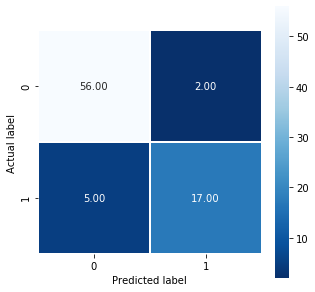

In [113]:
# better visual representation of confusion matrix
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');